<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [3]:
print("Dataset shape:", df.shape)
print("\nColumn Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (65437, 114)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
None

First 5 rows:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0          

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [10]:
print("\nMissing values per column:")
print(df.isnull().sum())
for col in df.columns:
    mode_value = df[col].mode(dropna=True)[0]
    df[col] = df[col].fillna(mode_value)


Missing values per column:
ResponseId             0
MainBranch             0
Age                    0
Employment             0
RemoteWork             0
                      ..
JobSatPoints_11        0
SurveyLength           0
SurveyEase             0
ConvertedCompYearly    0
JobSat                 0
Length: 114, dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [11]:
print(df['Employment'].value_counts())
print(df['JobSat'].value_counts())
print(df['YearsCodePro'].value_counts())

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work;Independent contra

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


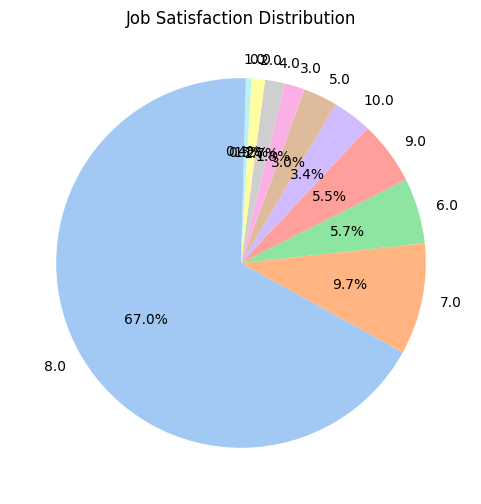

In [14]:
plt.figure(figsize=(6,6))
df['JobSat'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.ylabel('')
plt.title('Job Satisfaction Distribution')
plt.show()

The pie chart shows that the majority of respondents report being satisfied or very satisfied with their jobs, with a smaller proportion reporting dissatisfaction. This suggests generally positive sentiment in the dataset, though there is still a notable segment of respondents who are neutral or dissatisfied, which could indicate areas for improvement in workplace conditions.

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


In [ ]:
!pip install matplotlib-venn
from collections import Counter
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

have_worked = df['LanguageHaveWorkedWith'].dropna().str.split(';').sum()
want_work = df['LanguageWantToWorkWith'].dropna().str.split(';').sum()

have_counts = Counter(have_worked)
want_counts = Counter(want_work)

have_set = set(have_worked)
want_set = set(want_work)

plt.figure(figsize=(8, 6))
venn2([have_set, want_set],
      set_labels=("Have Worked With", "Want To Work With"))
plt.title("Programming Languages: Experience vs Interest")
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


<Figure size 2000x600 with 0 Axes>

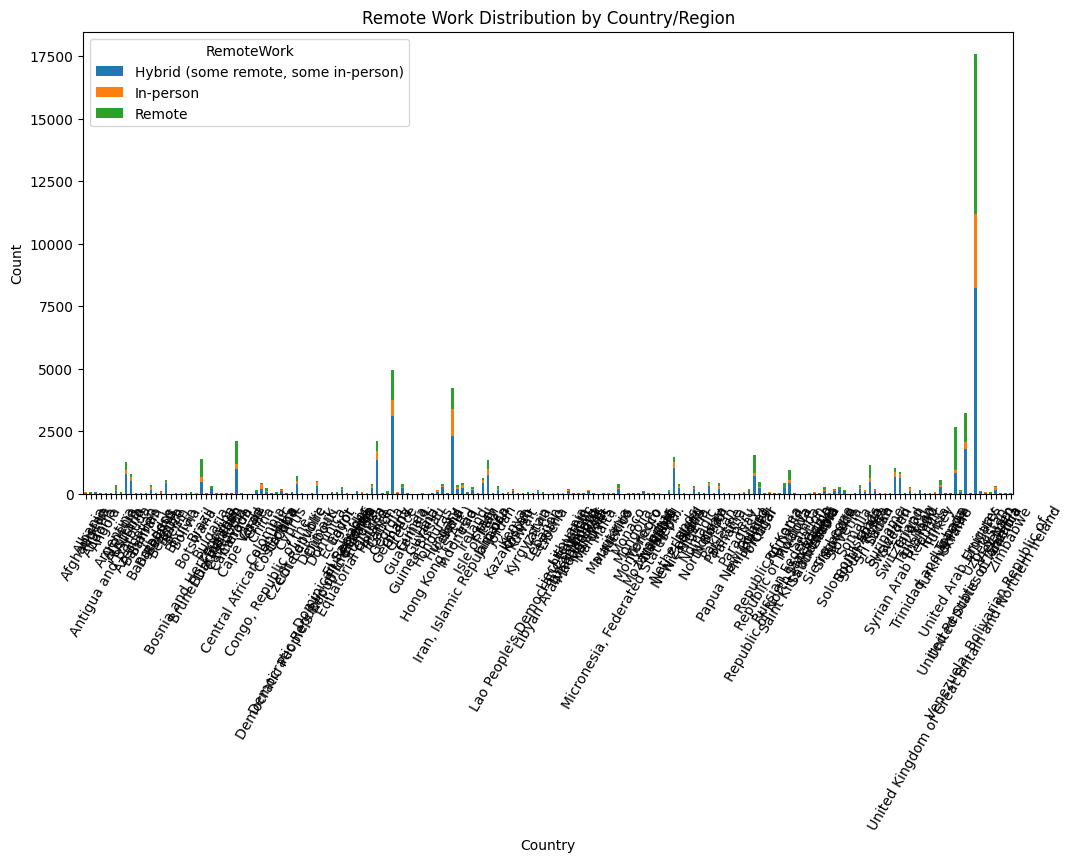

In [22]:
plt.figure(figsize=(20,6))
remote_region = pd.crosstab(df['Country'], df['RemoteWork'])
remote_region.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Remote Work Distribution by Country/Region")
plt.ylabel("Count")
plt.xticks(rotation=60)
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [24]:
from scipy.stats import pearsonr, spearmanr
import pandas as pd

df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

df_corr = df[['YearsCodePro', 'JobSat']].dropna()

pearson_corr, pearson_p = pearsonr(df_corr['YearsCodePro'], df_corr['JobSat'])

spearman_corr, spearman_p = spearmanr(df_corr['YearsCodePro'], df_corr['JobSat'])

print(f"Pearson correlation: {pearson_corr:.3f} (p={pearson_p:.3e})")
print(f"Spearman correlation: {spearman_corr:.3f} (p={spearman_p:.3e})")

Pearson correlation: 0.009 (p=2.738e-02)
Spearman correlation: -0.028 (p=4.477e-12)


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


/tmp/ipykernel_338/3993386616.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Employment_Grouped'] = df['Employment'].apply(group_employment)


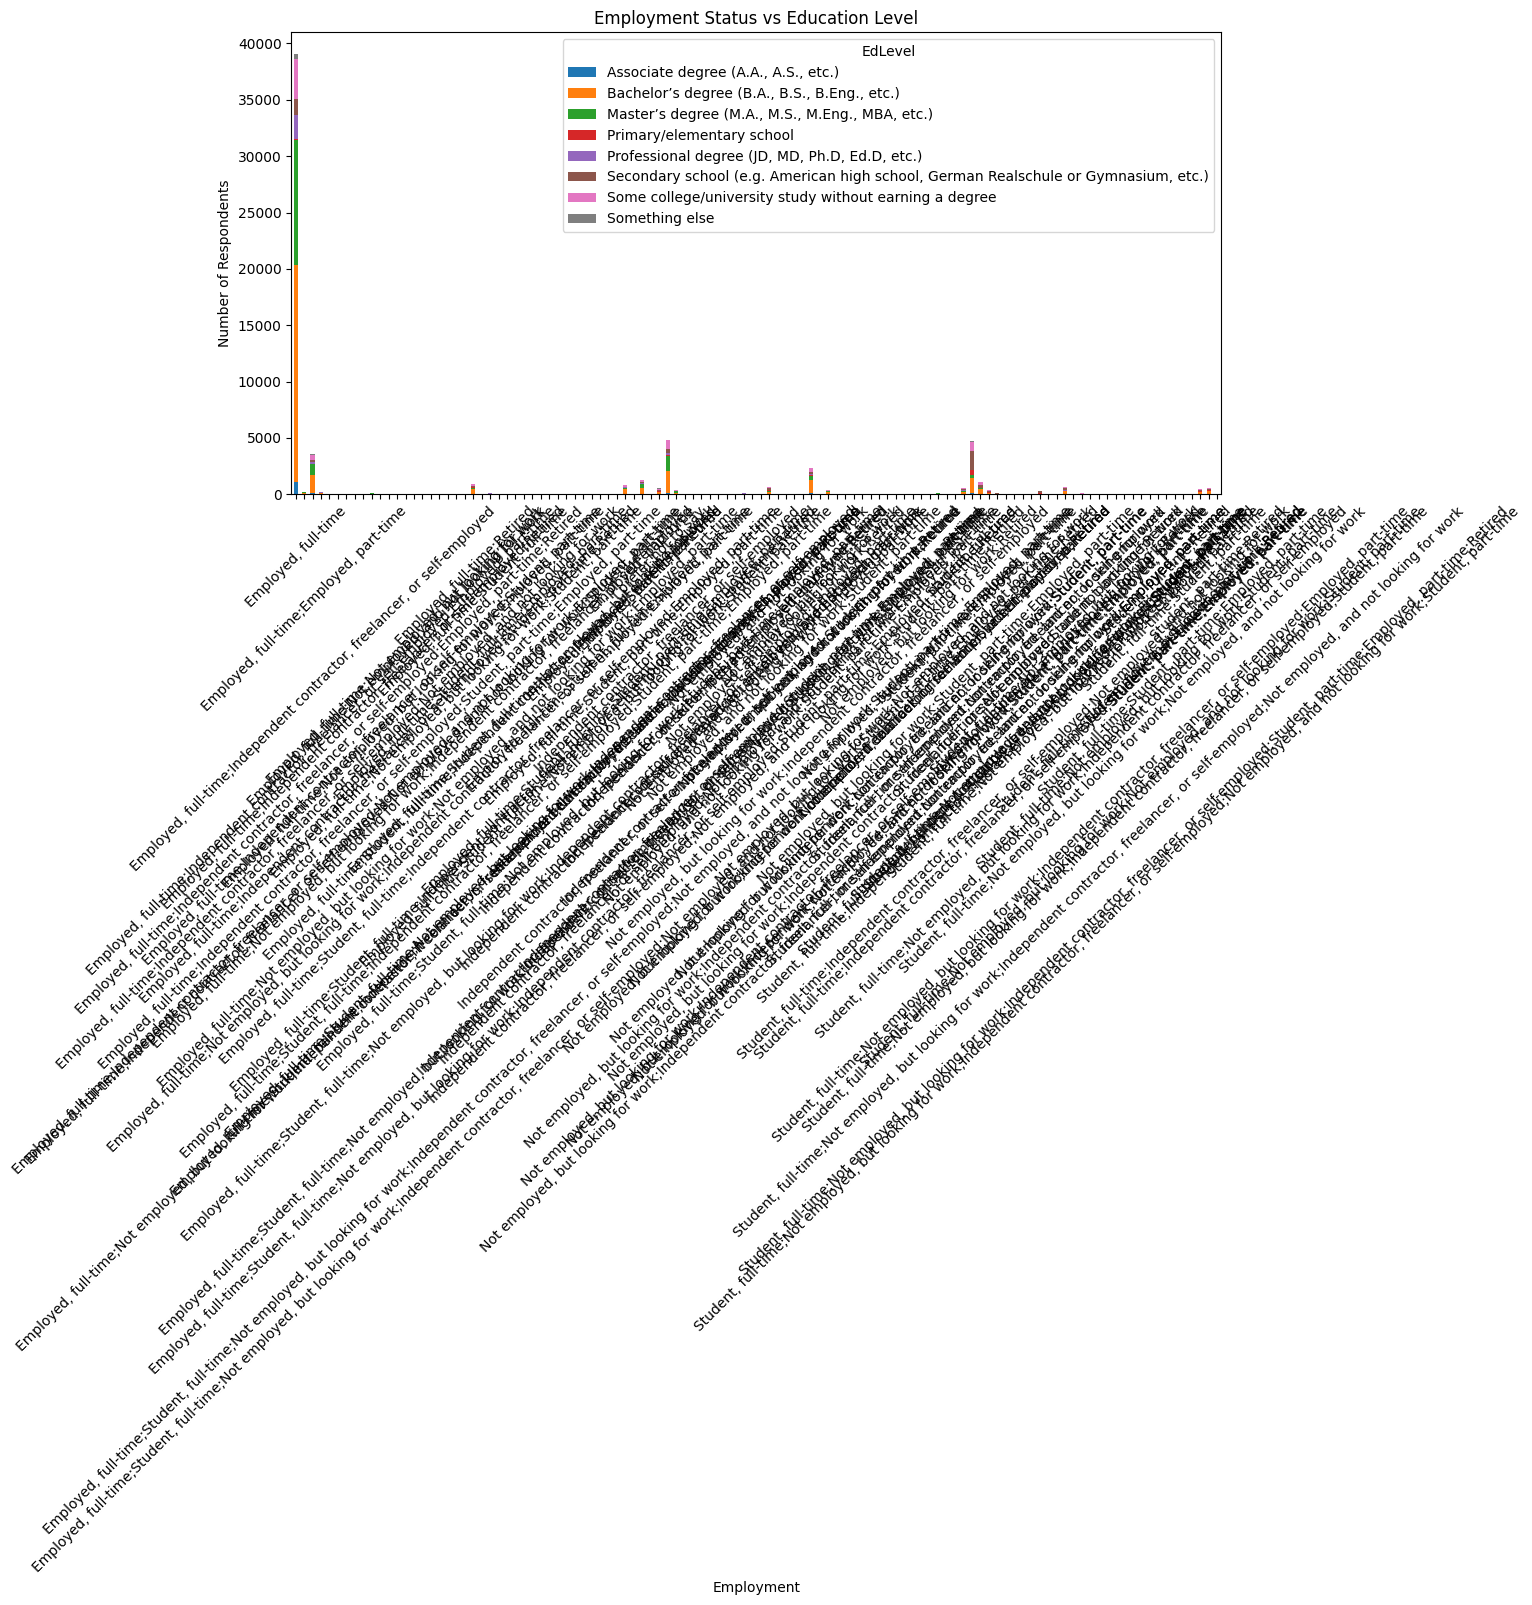

In [26]:

def group_employment(emp):
    if emp in ['Employed, full-time', 'Employed, part-time', 'Self-employed, full-time', 'Self-employed, part-time']:
        return 'Employed'
    elif emp in ['Not employed, but looking for work', 'Not employed, and not looking for work']:
        return 'Not Employed'
    elif emp in ['Independent contractor, freelancer, or self-employed']:
        return 'Independent Contractor'
    elif emp in ['Student, full-time', 'Student, part-time']:
        return 'Student'
    elif emp in ['Retired']:
        return 'Retired'
    else:
        return 'Other'

df['Employment_Grouped'] = df['Employment'].apply(group_employment)
edu_emp_ct_grouped = pd.crosstab(df['EdLevel'], df['Employment_Grouped'])
employment_education.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title("Employment Status vs Education Level")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45)
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
